# Bike Sharing System Case Study

Problem statement- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.  
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

In [1]:
# Importing all the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#import dataset
dataset = pd.read_csv("day.csv")
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# here instant is the serial number column so lets make it index column 
dataset = dataset.set_index("instant")
dataset.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
#lets check the shape of dataset on which we are working 
dataset.shape

(730, 15)

In [9]:
#Lets see the datatypes in dataset
dataset.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Data cleaning 

In [10]:
# now lets jump into Data cleaning , lets check the missing values present in dataset 
missing_Values = dataset.count()/len(dataset)
missing_Values

dteday        1.0
season        1.0
yr            1.0
mnth          1.0
holiday       1.0
weekday       1.0
workingday    1.0
weathersit    1.0
temp          1.0
atemp         1.0
hum           1.0
windspeed     1.0
casual        1.0
registered    1.0
cnt           1.0
dtype: float64

As you can see there isn't any missing values present in dataset , so we are good to proceed with further step 

In [14]:
#now lets replace mnth with the respective order month, which will be easy for data visualization
dataset["mnth"].describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: mnth, dtype: float64

In [15]:
 
conditions=[(dataset["mnth"]==1),(dataset["mnth"]==2),(dataset["mnth"]==3),(dataset["mnth"]==4),
           (dataset["mnth"]==5),(dataset["mnth"]==6),(dataset["mnth"]==7),(dataset["mnth"]==8),(dataset["mnth"]==9),(dataset["mnth"]==10),
           (dataset["mnth"]==11),(dataset["mnth"]==12)]
values= ("January","February","March","April","May","June","July","August","September","October","November","December")
dataset["mnth"]=np.select(conditions,values)
dataset

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,January,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,January,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,January,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,January,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,January,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,December,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,December,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,December,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [17]:
#now lets replace weekday with the respective order day, which will be easy for data visualization
dataset["weekday"].describe()

count    730.000000
mean       2.995890
std        2.000339
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64

In [18]:
#lets assume 0 is sunday and 6 is saturday 
conditions=[(dataset["weekday"]==0),(dataset["weekday"]==1),(dataset["weekday"]==2),(dataset["weekday"]==3),
           (dataset["weekday"]==4),(dataset["weekday"]==5),(dataset["weekday"]==6)]
values= ("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")
dataset["weekday"]=np.select(conditions,values)
dataset

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,January,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,January,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,January,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,January,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,January,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,December,0,Friday,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,December,0,Saturday,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,December,0,Sunday,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [19]:
#Lets rename the column with proper names 
dataset.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
dataset.head()

,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,January,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,January,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,January,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,January,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,January,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
#Lets Map variables season, weathersit
dataset['season']=dataset.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
dataset['weathersit']=dataset.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
dataset.head()

,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,January,0,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,January,0,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Visualization  

#### Lets identify continous and categorical function 

In [21]:
#Checking the unique values in the data
dataset.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
dteday        730
dtype: int64

Lets visualize every variable in pair plot and identify patterns in it 

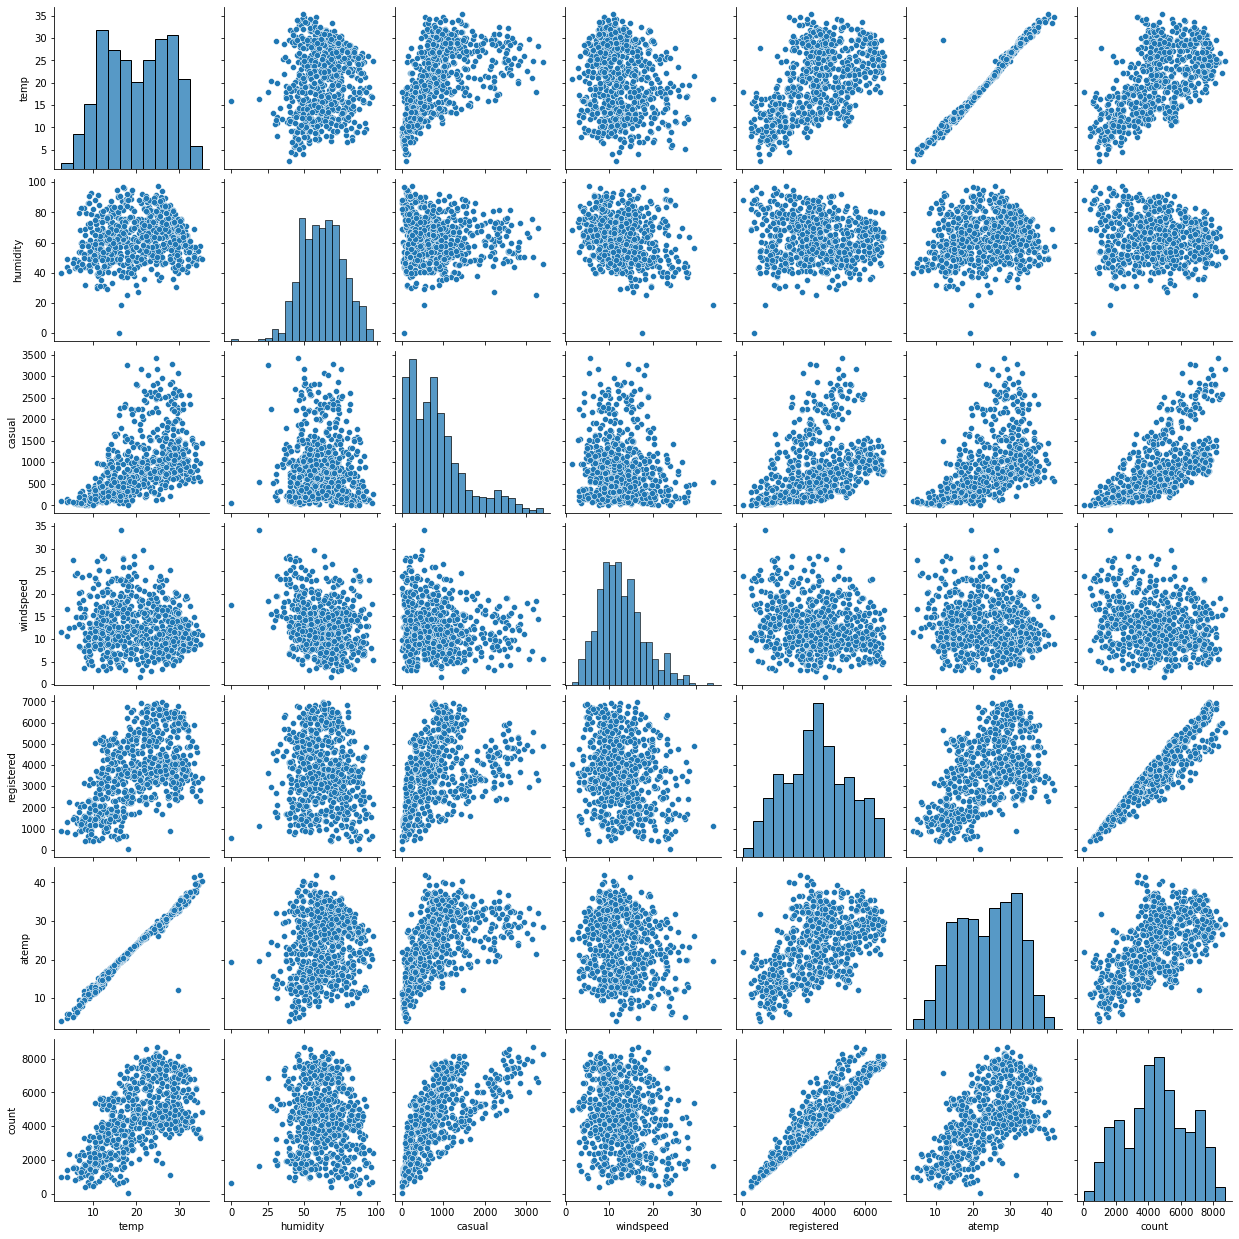

In [24]:
sns.pairplot(dataset, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count'])
plt.show()

At an instance Renting of bike is depended on temperature  

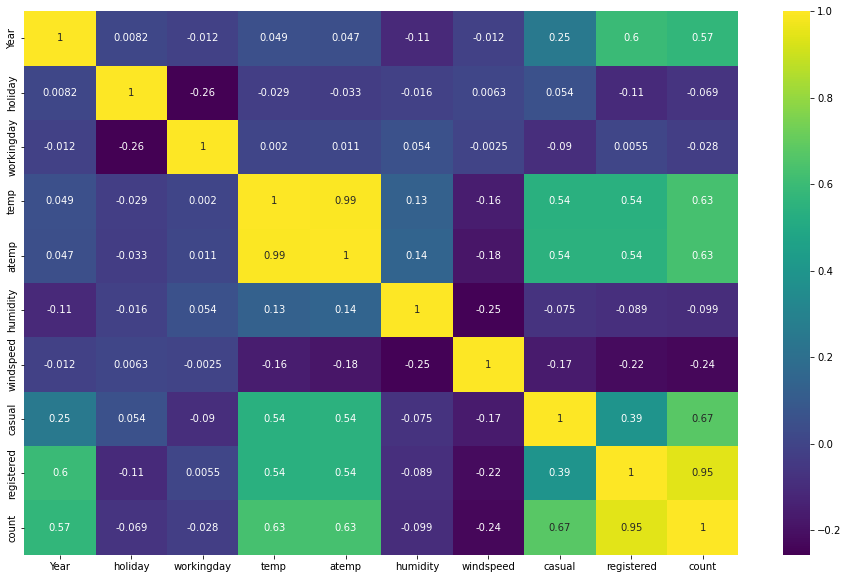

In [154]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.corr(), annot = True, cmap="viridis")
plt.show()

In [ ]:
#correlation between temp and atemp is 0.99 which is almost 1
#so we can drop temp and consider atemp, or we can only use atemp in data handling 

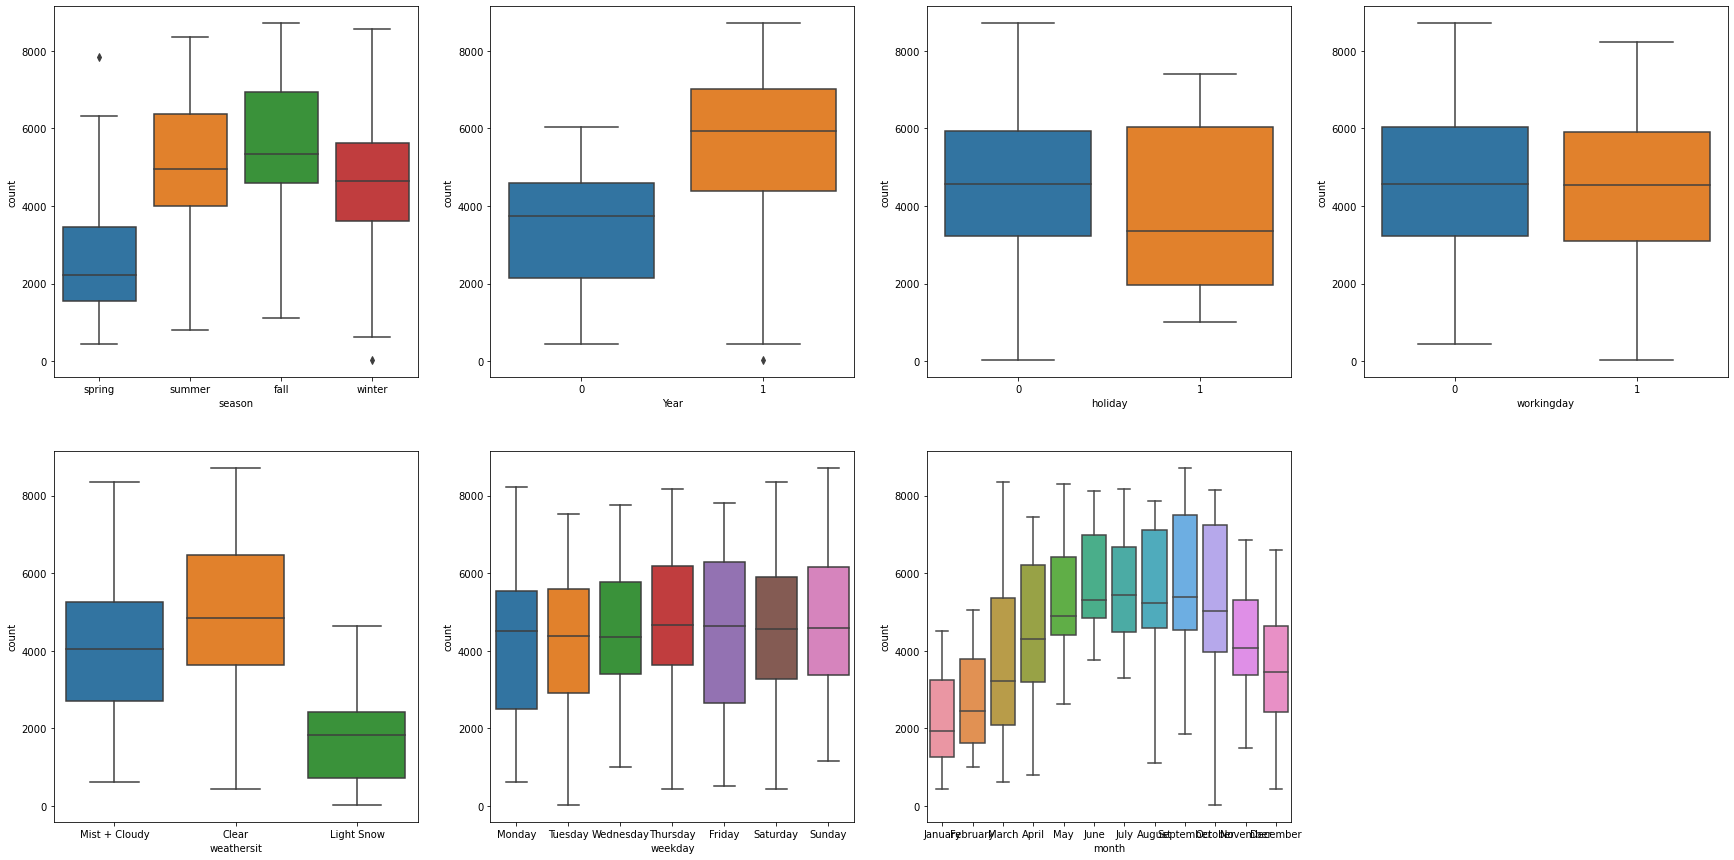

In [42]:
#Visualising categorical Variables with Box plot to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = dataset)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(2,4,2)
sns.boxplot(x = 'Year', y = 'count', data = dataset)
plt.subplot(2,4,7)
sns.boxplot(x = 'month', y = 'count', data = dataset)
plt.subplot(2,4,4)
sns.boxplot(x = 'workingday', y = 'count', data = dataset)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = dataset)
plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'count', data = dataset)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'count', data = dataset)
plt.show()

Insights shows as the renting of bikes are more in following cases 
- on Saturday,Sunday and thursday
- in the year 2019 compared to 2018
- during the Fall season and then in summer
- in clear weather


### Univariant Analysis

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


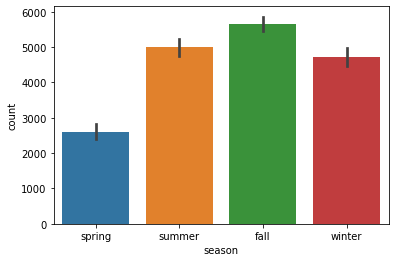

In [44]:
#Relation between season and count of bike rentals

sns.barplot('season','count',data=dataset)
plt.show()

as you can see bike rentals are more in fall season after that in summer  

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


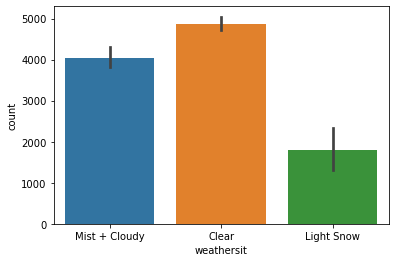

In [45]:
#Relation between weather and count of bike rentals
sns.barplot('weathersit','count',data=dataset)
plt.show()

as you can see bike rentals are more in clear weather 

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


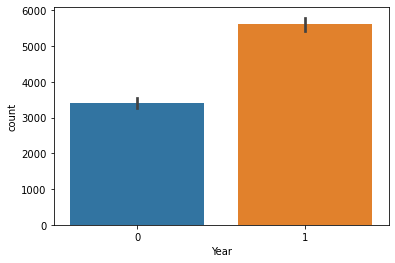

In [46]:
#Relation between Year and count of bike rentals
sns.barplot('Year','count',data=dataset)
plt.show()

0 : 2018 , 1: 2019 .
as you can see bike rentals are more in 2019 year 

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


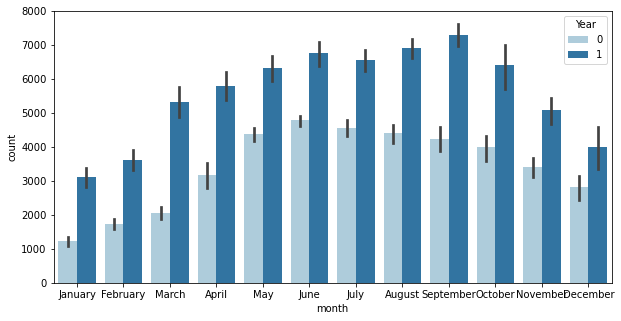

In [47]:
#Relation between month og 2018 and 2019 and bike rentals  
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='Year',data=dataset,palette='Paired')
plt.show()

Bike rentals are more in 2019 as compared to 2018 

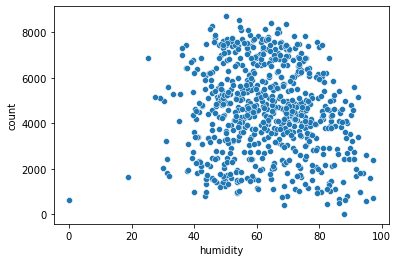

In [50]:
#Relation between humidity and bike rentals
sns.scatterplot(x='humidity', y='count',data=dataset)
plt.show()

Renting of bike is more in high humidity 

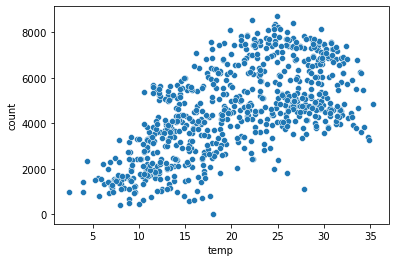

In [52]:
#Relation between temperature to count
sns.scatterplot(x='temp',y='count' ,data=dataset)
plt.show()

Renting of bike is more in higher temperature 

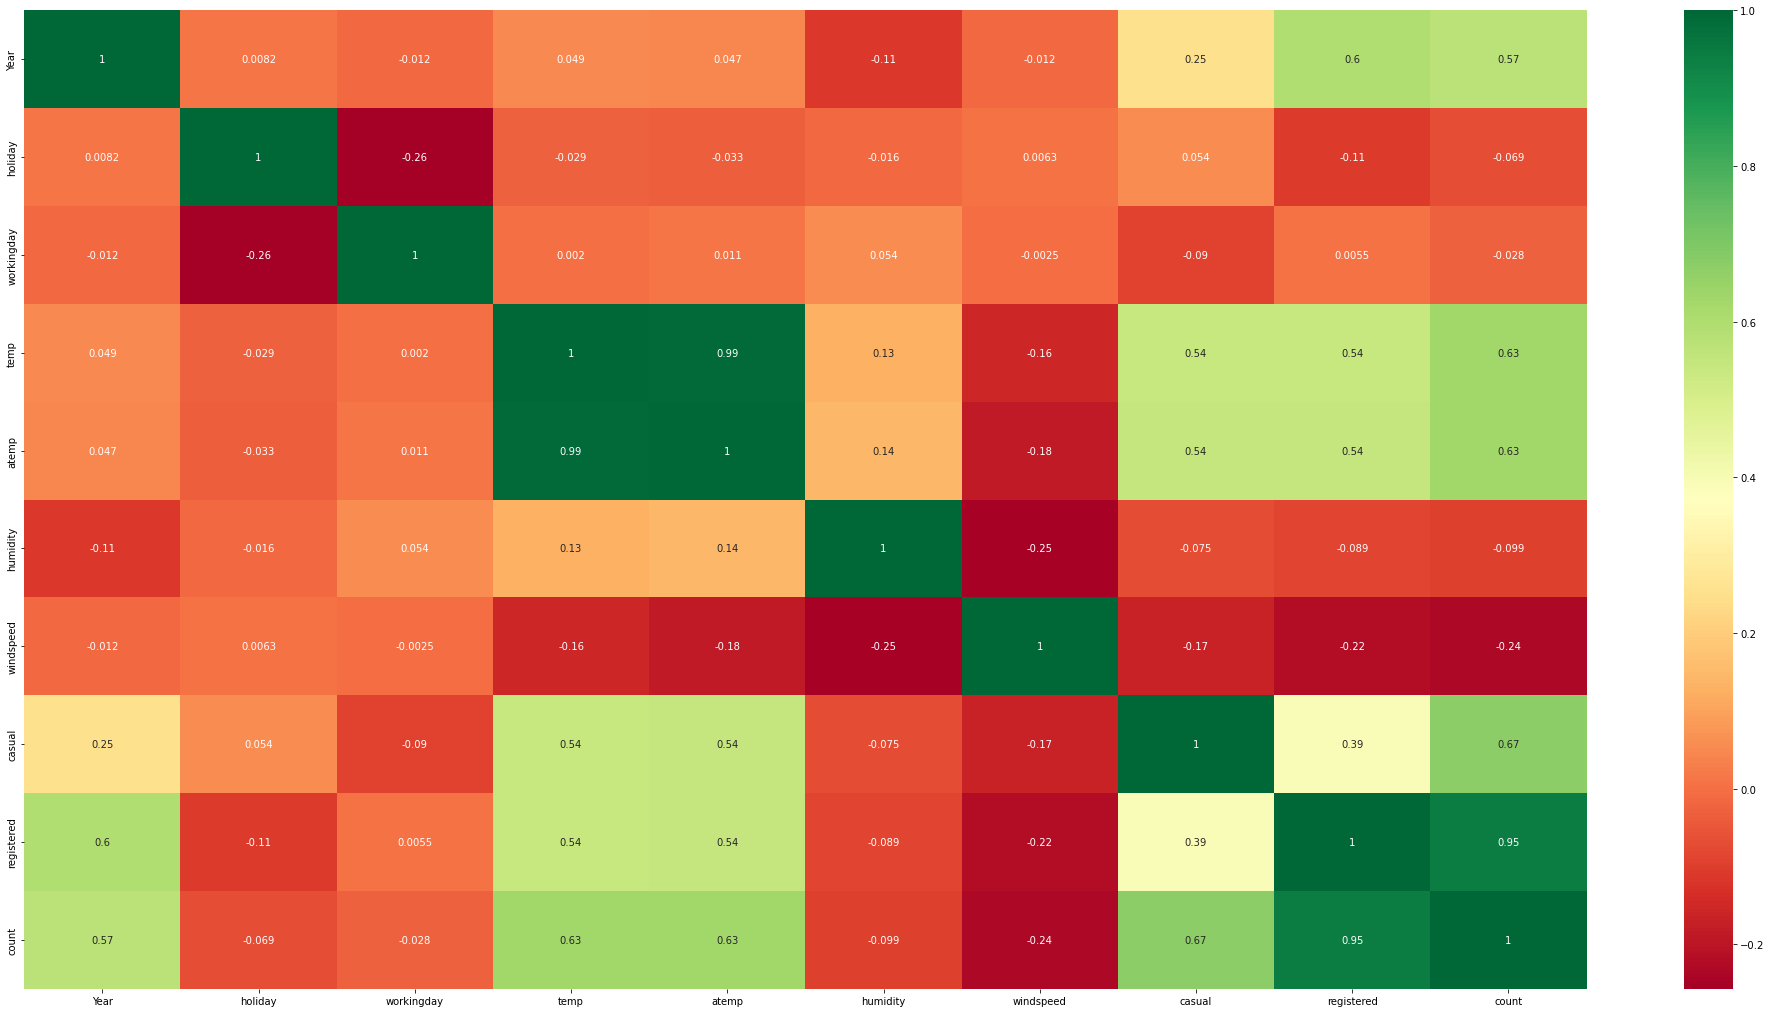

In [53]:
#visualize data in heat map 
plt.figure(figsize=(35, 18))
sns.heatmap(dataset.corr(), cmap='RdYlGn', annot = True)
plt.show()

we can see count variable is related to temp, atemp, casual,registered
- From this we can Linear Regression Model.

In [62]:
#we can drop unnecessary columns from dataset and make a new dataset = "dataset_2"
dataset_2=dataset.drop(['dteday','casual', 'registered','atemp'], axis=1)
dataset_2.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
instant,,,,,,,,,,,
1,spring,0,January,0,Monday,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
2,spring,0,January,0,Tuesday,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
3,spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
4,spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
5,spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [63]:
#Check datatypes of new library 
dataset_2.dtypes

season         object
Year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

#### Creating dummy variables 

In [69]:
# # Dummy variables for month, season, weathersit, weekday)

months=pd.get_dummies(dataset_2.month,drop_first=True)
weekdays=pd.get_dummies(dataset_2.weekday,drop_first=True)
weather_sit=pd.get_dummies(dataset_2.weathersit,drop_first=True)
seasons=pd.get_dummies(dataset_2.season,drop_first=True)

SyntaxError: unmatched ')' (Temp/ipykernel_13920/1046305479.py, line 6)

In [73]:
# Combining the results to the original bike dataframe

dataset_2=pd.concat([months,weekdays,weather_sit,seasons,dataset_2],axis=1)
dataset_2.head()

,August,December,February,January,July,June,March,May,November,October,...,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,...,0,January,0,Monday,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
2,0,0,0,1,0,0,0,0,0,0,...,0,January,0,Tuesday,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
3,0,0,0,1,0,0,0,0,0,0,...,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
4,0,0,0,1,0,0,0,0,0,0,...,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
5,0,0,0,1,0,0,0,0,0,0,...,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [74]:
#Since we have created dummy variables we can drop the original column 
# Drop 'season','month','weekday','weathersit' 

dataset_2.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
dataset_2.head()

,August,December,February,January,July,June,March,May,November,October,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
5,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [75]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   August         730 non-null    uint8  
 1   December       730 non-null    uint8  
 2   February       730 non-null    uint8  
 3   January        730 non-null    uint8  
 4   July           730 non-null    uint8  
 5   June           730 non-null    uint8  
 6   March          730 non-null    uint8  
 7   May            730 non-null    uint8  
 8   November       730 non-null    uint8  
 9   October        730 non-null    uint8  
 10  September      730 non-null    uint8  
 11  Monday         730 non-null    uint8  
 12  Saturday       730 non-null    uint8  
 13  Sunday         730 non-null    uint8  
 14  Thursday       730 non-null    uint8  
 15  Tuesday        730 non-null    uint8  
 16  Wednesday      730 non-null    uint8  
 17  Light Snow     730 non-null    uint8  
 18  Mist + Clo

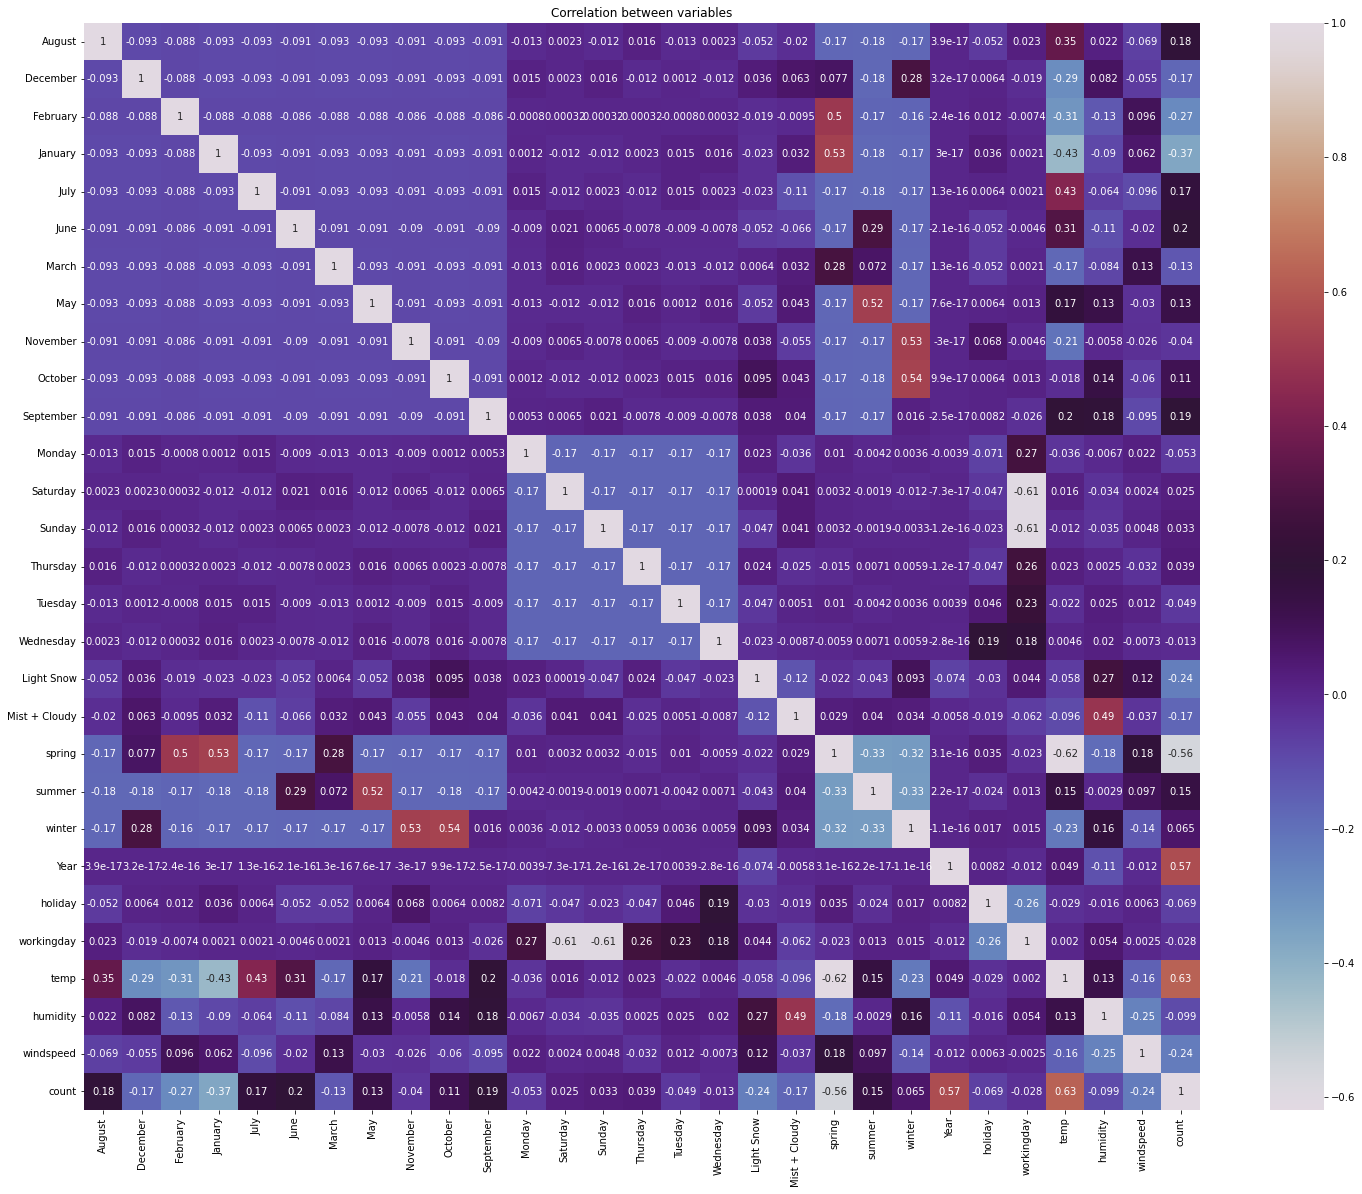

In [79]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables

plt.figure(figsize=(25, 20))
sns.heatmap(dataset_2.corr(), cmap='twilight', annot = True)
plt.title("Correlation between variables")
plt.show()

Temperature,Summer season,June to october months are in good correlation with the 'count' variable and has a good impact on bike rentals

### Training and Testing Sets

In [80]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

sample_train, sample_test = train_test_split(dataset_2, train_size = 0.7, random_state = 100)

In [82]:
sample_train.shape


(510, 29)

In [83]:
sample_test.shape

(220, 29)

#### Min-Max scalling

In [84]:
#import the library
from sklearn.preprocessing import MinMaxScaler

In [89]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
sample_train[num_vars] = scaler.fit_transform(sample_train[num_vars])
sample_train.head()

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,August,December,February,January,July,June,March,May,November,October,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
instant,,,,,,,,,,,,,,,,,,,,,
577,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
427,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
729,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
483,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
112,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [90]:
#checking min-max scalling
sample_train.describe()

,August,December,February,January,July,June,March,May,November,October,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the numeric variables are now mapped between 0 and 1

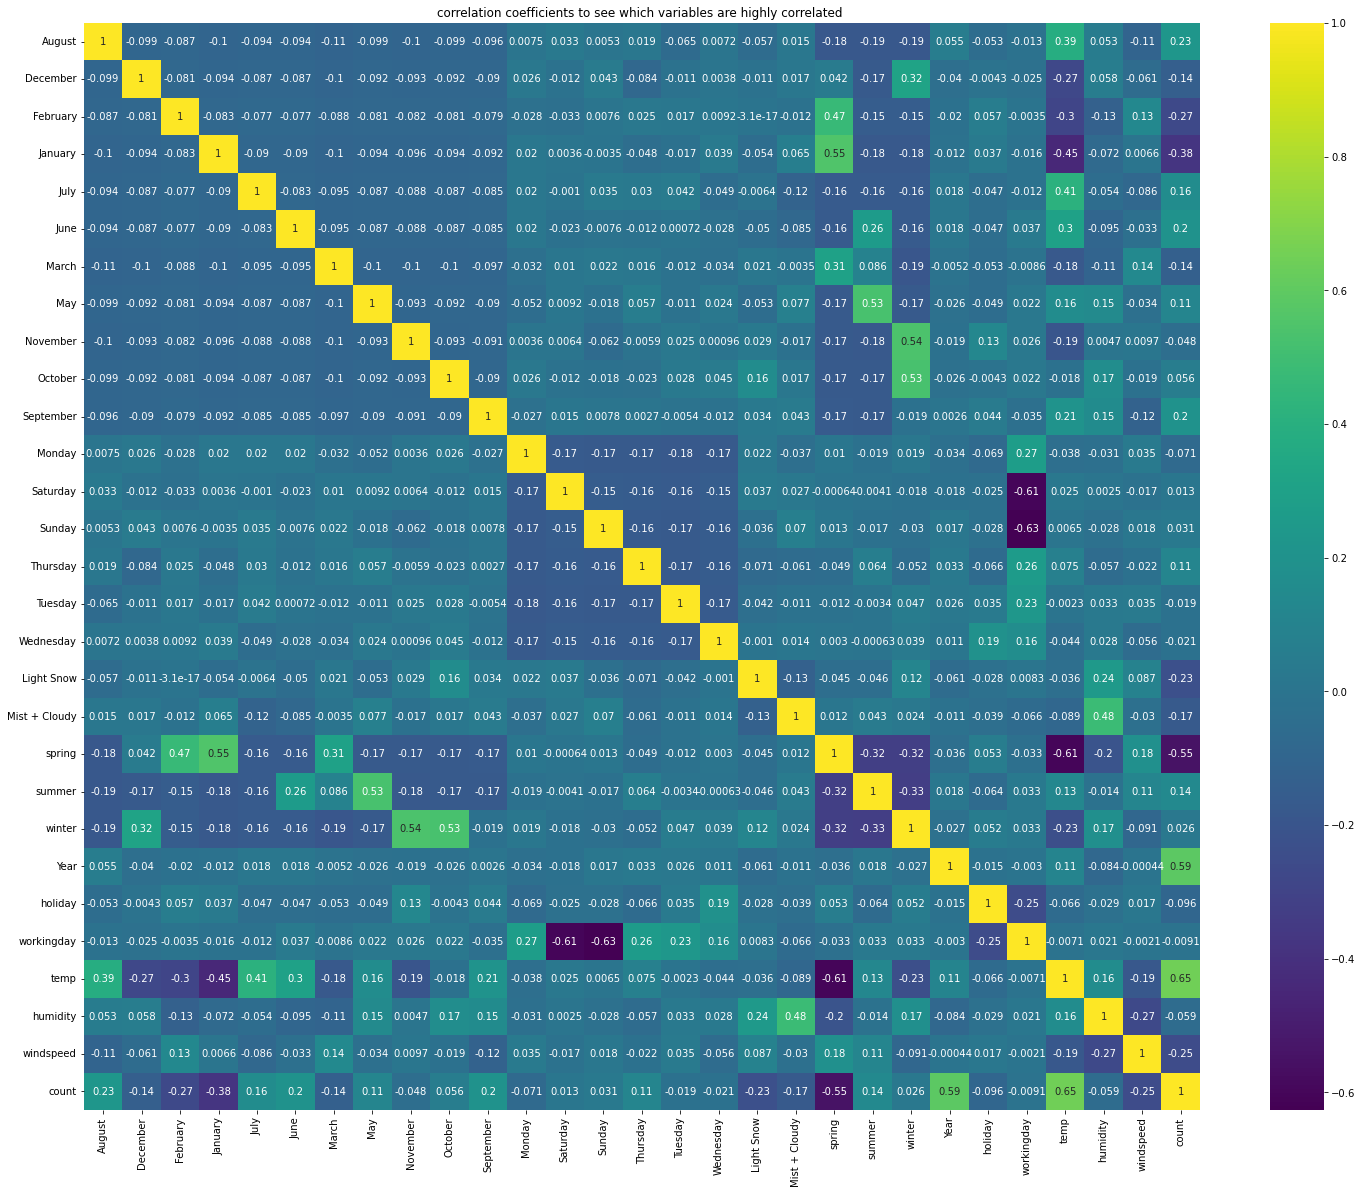

In [93]:
# Let's check the correlation coefficients to see which variables are highly correlated 
plt.figure(figsize=(25, 20))
sns.heatmap(sample_train.corr(),cmap='viridis',annot = True)
plt.title("correlation coefficients to see which variables are highly correlated ")
plt.show()

temp, year is correlated to the 'count' variable.August, September months counts are little high.

In [94]:
#Divide the data into X and y
y_train = sample_train.pop('count')
X_train = sample_train

### Building a linear model

In [95]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [96]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [97]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('August', False, 9),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('March', False, 14),
 ('May', False, 8),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [98]:
col = X_train.columns[rfe.support_]
col

Index(['December', 'January', 'July', 'November', 'September', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter', 'Year', 'holiday',
       'temp', 'humidity', 'windspeed'],
      dtype='object')

In [99]:
X_train.columns[~rfe.support_]

Index(['August', 'February', 'June', 'March', 'May', 'October', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'workingday'],
      dtype='object')

In [100]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [101]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [102]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [103]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Fri, 01 Jul 2022   Prob (F-statistic):          8.15e-189
Time:                        15:16:57   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

### Checking VIF

the formula for calculating VIF is 


### ( VIF_i = \frac{1}{1 - {R_i}^2} \)

In [104]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [105]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,30.89
12,temp,17.79
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.82
6,Mist + Cloudy,2.32
10,Year,2.09
3,November,1.85
1,January,1.75


September is insignificant in presence of other variables due to low VIF; can be dropped

In [107]:
#Drop September
X_train_new1 = X_train_rfe.drop(["September"], axis = 1)

Rebuilding the model without 'September'


In [108]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Fri, 01 Jul 2022   Prob (F-statistic):          9.90e-186
Time:                        15:24:24   Log-Likelihood:                 504.09
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     495   BIC:                            -914.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3474      0.036      9.593

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [109]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [110]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,29.60
11,temp,17.79
13,windspeed,4.71
6,spring,4.08
8,winter,3.94
7,summer,2.43
5,Mist + Cloudy,2.32
9,Year,2.09
3,November,1.82
1,January,1.75


'humidity' variable can be dropped as its insignificant by looking at very high VIF

In [111]:
#Drop humidity
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)

Rebuilding the model without 'humidity'

In [112]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.6
Date:                Fri, 01 Jul 2022   Prob (F-statistic):          9.02e-184
Time:                        15:26:51   Log-Likelihood:                 496.68
No. Observations:                 510   AIC:                            -965.4
Df Residuals:                     496   BIC:                            -906.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2772      0.032      8.764

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [113]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [114]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,windspeed,4.66
11,temp,4.51
8,winter,2.93
6,spring,2.80
9,Year,2.07
7,summer,2.01
3,November,1.79
1,January,1.65
5,Mist + Cloudy,1.55
2,July,1.47


Holiday variable seems to be insignificant, by looking at low VIF. We can drop it

In [115]:
#Drop the holiday column
X_train_new3=X_train_lm2.drop(['holiday'],axis=1)

Rebuliding the model without holiday

In [116]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.9
Date:                Fri, 01 Jul 2022   Prob (F-statistic):          9.65e-183
Time:                        15:29:00   Log-Likelihood:                 491.47
No. Observations:                 510   AIC:                            -956.9
Df Residuals:                     497   BIC:                            -901.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2763      0.032      8.657

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [117]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [118]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,windspeed,4.66
10,temp,4.50
8,winter,2.93
6,spring,2.79
9,Year,2.07
7,summer,2.01
3,November,1.77
1,January,1.65
5,Mist + Cloudy,1.55
2,July,1.47


Windspeed seems to be insignificant,by looking at high VIF, we can drop it

In [119]:
#Drop windspeed
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)

Rebuilding the model without windspeed

In [120]:
#Build a model
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     201.7
Date:                Fri, 01 Jul 2022   Prob (F-statistic):          1.68e-175
Time:                        15:31:06   Log-Likelihood:                 471.52
No. Observations:                 510   AIC:                            -919.0
Df Residuals:                     498   BIC:                            -868.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2151      0.032      6.804

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [121]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [122]:
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,3.58
8,winter,2.79
9,Year,2.07
6,spring,2.04
3,November,1.75
7,summer,1.73
1,January,1.65
5,Mist + Cloudy,1.55
0,December,1.46
2,July,1.46


July column can be dropped due to its p value and low VIF

In [123]:
#Drop July
X_train_new5=X_train_lm4.drop(['July'], axis=1)

Rebuilding the model without July

In [124]:
#Building a model
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     214.4
Date:                Fri, 01 Jul 2022   Prob (F-statistic):          1.61e-173
Time:                        15:33:30   Log-Likelihood:                 464.05
No. Observations:                 510   AIC:                            -906.1
Df Residuals:                     499   BIC:                            -859.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2129      0.032      6.643

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [125]:
#Drop the constant
X_train_lm7=X_train_lm5.drop(['const'],axis=1)

In [126]:
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,winter,2.64
9,temp,2.64
8,Year,2.07
5,spring,1.97
2,November,1.75
1,January,1.64
4,Mist + Cloudy,1.54
6,summer,1.53
0,December,1.46
3,Light Snow,1.07


Finally we have our model ! The VIFs and p-values both are within an acceptable range.

#### So our model is lm5 which is obtained by removing January, windspeed, holiday, July and humidity variables from the RFE support columns**

### Residual Analysis of the train data

In [127]:
X_train_lm5

,const,December,January,November,Light Snow,Mist + Cloudy,spring,summer,winter,Year,temp
instant,,,,,,,,,,,
577,1.0,0,0,0,0,0,0,0,0,1,0.815169
427,1.0,0,0,0,0,1,1,0,0,1,0.442393
729,1.0,1,0,0,0,0,1,0,0,1,0.245101
483,1.0,0,0,0,0,1,0,1,0,1,0.395666
112,1.0,0,0,0,0,1,0,1,0,0,0.345824
...,...,...,...,...,...,...,...,...,...,...,...
579,1.0,0,0,0,0,0,0,0,0,1,0.863973
54,1.0,0,0,0,0,0,1,0,0,0,0.202618
351,1.0,1,0,0,0,1,0,0,1,0,0.248216


In [128]:
y_train_pred = lm5.predict(X_train_lm5)

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

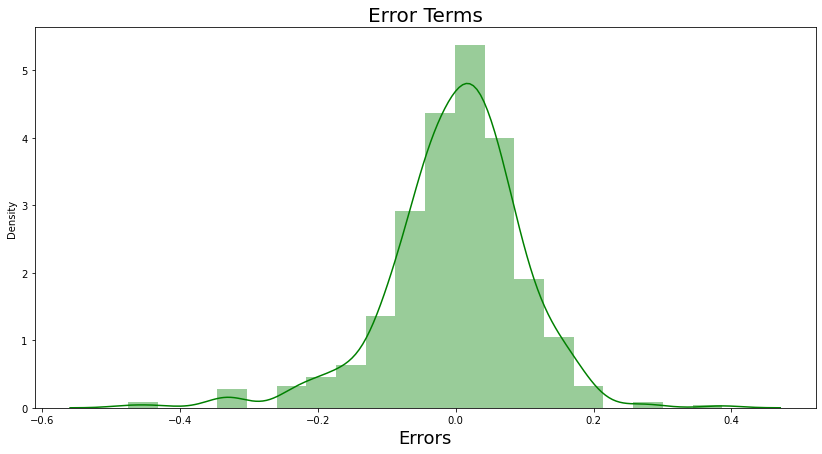

In [131]:
fig = plt.figure()

plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20,color="g")

plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

Error terms are normally distributed

### Making Predictions

In [132]:
#Create a list of numeric variables

num_vars=['temp','humidity','windspeed','count']

#Fit on data
sample_test[num_vars] = scaler.transform(sample_test[num_vars])
sample_test.head()

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,August,December,February,January,July,June,March,May,November,October,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
instant,,,,,,,,,,,,,,,,,,,,,
185,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
536,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
300,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
222,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
153,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [143]:
X_train_new5.columns

Index(['December', 'January', 'November', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', 'Year', 'temp'],
      dtype='object')

In [146]:
X_test = sample_test
X_test.describe()

,August,December,February,January,July,June,March,May,November,October,...,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [147]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

C:\Users\RUTVIK MORE\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,December,January,November,Light Snow,Mist + Cloudy,spring,summer,winter,Year,temp
instant,,,,,,,,,,,
185,1.0,0,0,0,0,1,0,0,0,0,0.831783
536,1.0,0,0,0,0,0,0,1,0,1,0.901354
300,1.0,0,0,0,0,1,0,0,1,0,0.511964
222,1.0,0,0,0,0,0,0,0,0,0,0.881625
153,1.0,0,0,0,0,0,0,1,0,0,0.817246


In [148]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

### Finding R-squared and Adjusted R-Squared for Test set

In [150]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8197779368322966

In [151]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8197779368)*(11-1)/(11-1-1)
print(Adj_r2)

0.7997532631111111


### Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

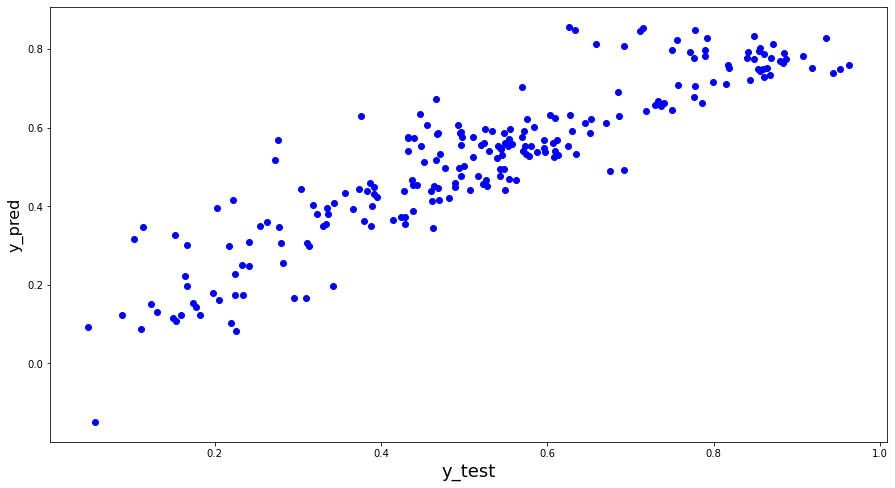

In [152]:
# Plotting y_test and y_pred 
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   

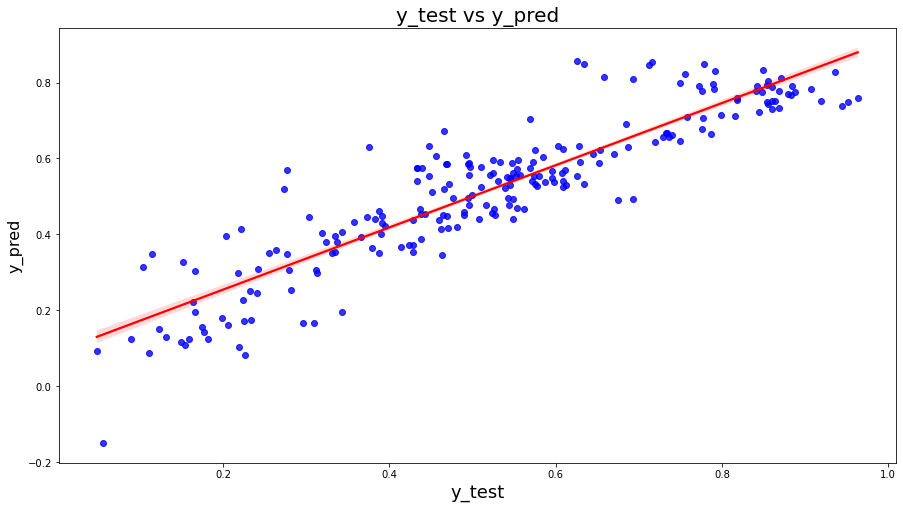

In [153]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

### Analysis Comparison between Train model and Test model:

- Train - R^2 : 0.811
- Train - Adjusted R^2 : 0.807
- Test - R^2: 0.819
- Test - Adjusted R^2: 0.799
- Difference in R^2 between train and test: -0.98 %
- Difference in adjusted R^2 between Train and test: 0.99%

## Final recommendations for the company:
- Temperature could be a prime factor for making decision for the Organisation
- We can see demand for bikes was more in 2019 than 2018
- Working days as they have good influence on bike rentals. So it would be great to provide offers to the working individuals
- Demand is higher in month of 3, 5 , 6, 7, 8, 9 and 10

 #### We can see the demand for bikes depends mainly on below variables:
- yr , holiday ,Spring, Mist_Cloudy, Light rain_Light snow_Thunderstorm,3 ,5 ,6, 8, 9, sunday, 7, 10
- Demands increases in the month of 3, 5, 6, 7, 8 ,9, 10 and yr
- Demand decreases if it is holiday , Spring, Light rain_Light snow_Thunderstorm, Mist_cloudy, Sunday

### Thank You 
